<a href="https://colab.research.google.com/github/NicoPP1/PDI/blob/main/TP3/TP3Parmav2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo práctico Nº3 Procesamiento Digital de Imágenes
### Autor: Nicolás Daniel Parma Paternostro
### Consigna: 
Seleccionar dos imágenes y con estas poder acceder a un menú que permita realizar las siguientes operaciones entre estas:
* En espacio RGB: Sumas y restas: clampeada y promediada.
* Es espacio YIQ: Sumas y Restas: clampeada, promediada. if-ligther, if-darker.
El resultado de estas se debe guardar como una nueva imagen.
Se deben mostrar los resultados de todas las operaciones mencionadas.

### Fecha de entrega: 1 de OCTUBRE

###Librerias



In [ ]:
#Librerias
import imageio
import numpy as np
import matplotlib.pyplot as plt

###Método interactivo para cargar imágenes. Se verifica que las dos imágenes tengan las mismas dimensiones, en caso de que esto no suceda, se recortaran las imágenes al menor ancho y alto para poder realizar las distintas operaciones.

filas de A menor que B y columnas de A menor que B
filas de A: 512, columas: 512
filas de B: 512, columas: 512


Text(0.5, 1.0, 'Imagen B modificada')

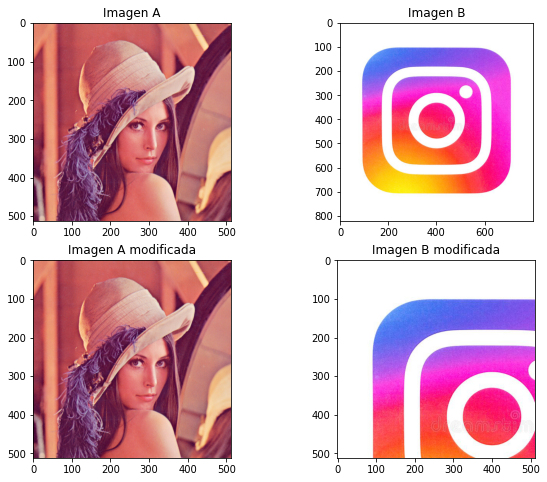

In [ ]:
#@title Ingrese URL de la imagen A { run: "auto", vertical-output: true }
urlA = "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png" #@param {type:"string"}

#@title Ingrese URL de la imagen B
urlB = "https://thumbs.dreamstime.com/b/nuevo-logotipo-de-instagram-128373493.jpg" #@param {type:"string"}

#Leo las imágenes
imgA = imageio.imread(urlA)
imgB = imageio.imread(urlB)

#Obtengo dimensiones de las imágenes
dimA = imgA.shape
dimB = imgB.shape

#Igualo las imagenes modificadas a las originales para su posterior recorte
imgAmod = imgA
imgBmod = imgB

#Observo los anchos y altos para determinar cuales son los menores y aplicar los
#recortes adecuados
if (dimA[0] != dimB[0]) or (dimA[1] != dimB[1]):
    if (dimA[0] >= dimB[0]) and (dimA[1] >= dimB[1]):
        print("filas de A mayor que B y columnas de A mayor que B")
        imgAmod = imgA[0:dimB[0],0:dimB[1]]
        imgBmod = imgB

    elif (dimA[0] >= dimB[0]) and (dimA[1] <= dimB[1]):
        print("filas de A mayor que B y columnas de A menor que B")
        imgAmod = imgA[0:dimB[0],:]
        imgBmod = imgB[:,0:dimA[1]]

    elif (dimA[0] <= dimB[0]) and (dimA[1] >= dimB[1]):
        print("filas de A menor que B y columnas de A mayor que B")
        imgAmod = imgA[:,0:dimB[1]]
        imgBmod = imgB[0:dimA[0],:]

    elif (dimA[0] <= dimB[0]) and (dimA[1] <= dimB[1]):
        print("filas de A menor que B y columnas de A menor que B")
        imgAmod = imgA
        imgBmod = imgB[0:dimA[0],0:dimA[1]]    

#Obtengo las dimensiones de las imágenes modificadas y las muestro
dimAmod = imgAmod.shape
dimBmod = imgBmod.shape

print(f"filas de A: {dimAmod[0]}, columas: {dimAmod[1]}")
print(f"filas de B: {dimBmod[0]}, columas: {dimBmod[1]}")

#Creo subplot para mostrar las imágenes a la par
fig1, ax1 = plt.subplots(2,2)
fig1.set_size_inches(10, 8)

ax1[0,0].imshow(imgA)
ax1[0,0].set_title("Imagen A")

ax1[0,1].imshow(imgB)
ax1[0,1].set_title("Imagen B")

ax1[1,0].imshow(imgAmod)
ax1[1,0].set_title("Imagen A modificada")

ax1[1,1].imshow(imgBmod)
ax1[1,1].set_title("Imagen B modificada")


### Funciones necesarias para trabajar en los distintos espacios RGB e YIQ


In [ ]:
#Función para clipear la luminancia
def clipY(mat):
    mat = np.clip(mat,0.0,1.0)
    return mat

#Función para clipear la componente en fase
def clipI(mat):
    mat = np.clip(mat,-0.5957,0.5957)          
    return mat

#Función para clipear la el componente en cuadratura
def clipQ(mat):
    mat = np.clip(mat,-0.5226,0.5226)          
    return mat

#Función para obtener componentes RGB de una imagen y devolverlo en el espacio YIQ
def RGB2YIQ(img):
    img = img.astype(float) #Cambio tipo de dato para trabajar en float

    #obtengo los componentes RGB
    r,g,b = RGB(img)

    #normalizo canales
    r = r/255 
    g = g/255 
    b = b/255 

    #Obtengo las dimensniones de la imagen
    dimension = img.shape

    #Creo matrices con zeros 
    Y = np.zeros((dimension[0],dimension[1]), dtype = float)
    I = np.zeros((dimension[0],dimension[1]), dtype = float)
    Q = np.zeros((dimension[0],dimension[1]), dtype = float)

    #Obtengo matrices YIQ
    Y = (r*0.299+g*0.587+b*0.114)
    I = (r*0.595716-g*0.274453-b*0.321263)
    Q = (r*0.211456-g*0.522591+b*0.311135)

    #Clipeo las matrices YIQ a sus respectivos rangos
    Y = clipY(Y)
    I = clipI(I)
    Q = clipQ(Q)

    return(Y,I,Q)

#Función para obtener los canales RGB de una imagen
def RGB(img):
    img = img.astype(float) #Cambio tipo de dato para trabajar en float

    #Obtengo las dimensiones de la imagen 
    dimension = img.shape

    #Creo matrices vacias
    r = np.zeros((dimension[0],dimension[1]), dtype = float)
    g = np.zeros((dimension[0],dimension[1]), dtype = float)
    b = np.zeros((dimension[0],dimension[1]), dtype = float)

    #Obtengo componentes RGB
    r = img[:,:,0]
    g = img[:,:,1]
    b = img[:,:,2]

    #Clipeo los componentes RGB
    r = np.clip(r,0,255)
    g = np.clip(g,0,255)
    b = np.clip(b,0,255)

    return r,g,b

#Función para obtener una imagen RGB a partir de los componentes YIQ modificadas
def YIQ2RGB(Y,I,Q):
    Y = clipY(Y) #función para clipear luminancia
    I = clipI(I) #función para clipear luminancia
    Q = clipQ(Q) #función para clipear luminancia

    #Obtengo las dimensiones de la imagen
    dimension = Y.shape

    #Creo matrices para componentes RGB vacias
    r = np.zeros((dimension[0],dimension[1]), dtype = float)
    g = np.zeros((dimension[0],dimension[1]), dtype = float)
    b = np.zeros((dimension[0],dimension[1]), dtype = float)

    #Asigno los valores a los canales RGB
    r = (Y+0.9563*I+0.621*Q)*255
    g = (Y-0.2721*I-0.6474*Q)*255
    b = (Y-1.1070*I+1.7046*Q)*255

    #Clipeo los componentes RGB
    r = np.clip(r,0,255)
    g = np.clip(g,0,255)
    b = np.clip(b,0,255)
    
    img = np.zeros((dimension[0],dimension[1],3),dtype = 'uint8') #Transformo a tipo de dato uint8 ya que es el requerido para mostrar las imágenes
    img[:,:,0] = r
    img[:,:,1] = g
    img[:,:,2] = b

    return(img)

###Funciones para realizar la implementación de las operaciones y se dispone de un menú desplegable interactivo para poder seleccionar la operación que se desea realizar.


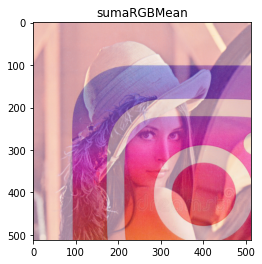

In [ ]:
#@title Seleccione del menú la operación a realizar { run: "auto", vertical-output: true }
#@title  { run: "auto", vertical-output: true }

#Función para realizar la operación suma RGB clip
def sumaRGBClip(imgAmod, imgBmod):
    RA,GA,BA = RGB(imgAmod)
    RB,GB,BB = RGB(imgBmod)

    RC = RA+RB
    GC = GA+GB
    BC = BA+BB

    RC = np.clip(RC,0,255)
    GC = np.clip(GC,0,255)
    BC = np.clip(BC,0,255)

    img = np.zeros((dimAmod[0],dimAmod[1],3),dtype = 'uint8')
    img[:,:,0] = RC
    img[:,:,1] = GC
    img[:,:,2] = BC

    return(img)

#Función para realizar la operación suma RGB promediada
def sumaRGBMean(imgAmod, imgBmod):
    RA,GA,BA = RGB(imgAmod)
    RB,GB,BB = RGB(imgBmod)

    RC = (RA+RB)//2
    GC = (GA+GB)//2
    BC = (BA+BB)//2

    RC = np.clip(RC,0,255)
    GC = np.clip(GC,0,255)
    BC = np.clip(BC,0,255)

    img = np.zeros((dimAmod[0],dimAmod[1],3),dtype = 'uint8')
    img[:,:,0] = RC
    img[:,:,1] = GC
    img[:,:,2] = BC

    return(img)

#Función para realizar la operación suma YIQ clip
def sumaYIQClip(imgAmod, imgBmod):
    YA,IA,QA = RGB2YIQ(imgAmod)
    YB,IB,QB = RGB2YIQ(imgBmod)

    YC = YA+YB
    IC = (YA*IA+YB*IB)/(YA+YB)
    QC = (YA*QA+YB*QB)/(YA+YB)

    #Los clips se realizan en la función YIQ2RGB
    imgC = YIQ2RGB(YC,IC,QC)
    return(imgC)

#Función para realizar la operación suma YIQ promediada
def sumaYIQMean(imgAmod, imgBmod):
    YA,IA,QA = RGB2YIQ(imgAmod)
    YB,IB,QB = RGB2YIQ(imgBmod)

    YC = (YA+YB)/2
    IC = (YA*IA+YB*IB)/(YA+YB)
    QC = (YA*QA+YB*QB)/(YA+YB)
    
    imgC = YIQ2RGB(YC,IC,QC)
    return(imgC)

#Función para realizar la operación if lighter en YIQ
def YIQiflighter(imgAmod, imgBmod):
    YA,IA,QA = RGB2YIQ(imgAmod)
    YB,IB,QB = RGB2YIQ(imgBmod)

    YC = np.zeros([imgAmod.shape[0],imgAmod.shape[1]], dtype = float)
    IC = np.zeros([imgAmod.shape[0],imgAmod.shape[1]], dtype = float)
    QC = np.zeros([imgAmod.shape[0],imgAmod.shape[1]], dtype = float)

    for i in range(imgAmod.shape[0]):
        for j in range(imgAmod.shape[1]):
            if YA[i,j]>=YB[i,j]:
                YC[i,j] = YA[i,j]
                IC[i,j] = IA[i,j]
                QC[i,j] = QA[i,j]
            else:
                YC[i,j] = YB[i,j]
                IC[i,j] = IB[i,j]
                QC[i,j] = QB[i,j]

    imgC = YIQ2RGB(YC,IC,QC)
    return(imgC)

#Función para realizar la operación resta RGB clip
def restaRGBClip(imgAmod,imgimgBmodB):
    RA,GA,BA = RGB(imgAmod)
    RB,GB,BB = RGB(imgBmod)

    RC = RA-RB
    GC = GA-GB
    BC = BA-BB

    RC = np.clip(RC,0,255)
    GC = np.clip(GC,0,255)
    BC = np.clip(BC,0,255)

    img = np.zeros((dimAmod[0],dimAmod[1],3),dtype = 'uint8')
    img[:,:,0] = RC
    img[:,:,1] = GC
    img[:,:,2] = BC

    return(img)

#Función para realizar la operación resta RGB promediada
def restaRGBMean(imgAmod, imgBmod):
    RA,GA,BA = RGB(imgAmod)
    RB,GB,BB = RGB(imgBmod)

    RC = (RA-RB)//2
    GC = (GA-GB)//2
    BC = (BA-BB)//2

    RC = np.clip(RC,0,255)
    GC = np.clip(GC,0,255)
    BC = np.clip(BC,0,255)

    img = np.zeros((dimAmod[0],dimAmod[1],3),dtype = 'uint8')
    img[:,:,0] = RC
    img[:,:,1] = GC
    img[:,:,2] = BC

    return(img)

#Función para realizar la operación resta YIQ clip
def restaYIQClip(imgAmod, imgBmod):
    YA,IA,QA = RGB2YIQ(imgAmod)
    YB,IB,QB = RGB2YIQ(imgBmod)

    YC = YA-YB
    IC = (YA*IA-YB*IB)/(YA+YB)
    QC = (YA*QA-YB*QB)/(YA+YB)
    
    #Los clips se realizan en la función YIQ2RGB
    imgC = YIQ2RGB(YC,IC,QC)

    return(imgC)

#Función para realizar la operación resta YIQ promediada
def restaYIQMean(imgAmod, imgBmod):
    YA,IA,QA = RGB2YIQ(imgAmod)
    YB,IB,QB = RGB2YIQ(imgBmod)

    YC = (YA-YB)/2
    IC = (YA*IA-YB*IB)/(YA+YB)
    QC = (YA*QA-YB*QB)/(YA+YB)

    #Los clips se realizan en la función YIQ2RGB
    imgC = YIQ2RGB(YC,IC,QC)
    
    return(imgC)

#Función para realizar la operación if darker en YIQ
def YIQifdarker(imgAmod, imgBmod):
    YA,IA,QA = RGB2YIQ(imgAmod)
    YB,IB,QB = RGB2YIQ(imgBmod)
    YC = np.zeros([imgAmod.shape[0],imgAmod.shape[1]], dtype = float)
    IC = np.zeros([imgAmod.shape[0],imgAmod.shape[1]], dtype = float)
    QC = np.zeros([imgAmod.shape[0],imgAmod.shape[1]], dtype = float)

    for i in range(imgAmod.shape[0]):
        for j in range(imgAmod.shape[1]):
            if YA[i,j]>=YB[i,j]:
                YC[i,j] = YB[i,j]
                IC[i,j] = IB[i,j]
                QC[i,j] = QB[i,j]
            else:
                YC[i,j] = YA[i,j]
                IC[i,j] = IA[i,j]
                QC[i,j] = QA[i,j]

    imgC = YIQ2RGB(YC,IC,QC)
    return(imgC)    

#@title  { run: "auto", vertical-output: true }

#Cadena de ifs para determinar que operación desea realizar el usuario
operation = "sumaRGBMean" #@param ["sumaRGBClip", "sumaRGBMean", "sumaYIQClip", "sumaYIQMean", "YIQiflighter", "restaRGBClip", "restaRGBMean", "restaYIQClip", "restaYIQMean", "YIQifdarker"]
if operation == "sumaRGBClip":
    plt.title(operation)
    plt.imshow(sumaRGBClip(imgAmod,imgBmod))

elif operation == "sumaRGBMean":
    plt.title(operation)
    plt.imshow(sumaRGBMean(imgAmod,imgBmod))

elif operation == "sumaYIQClip":
    plt.title(operation)
    plt.imshow(sumaYIQClip(imgAmod,imgBmod))

elif operation == "sumaYIQMean":
    plt.title(operation)
    plt.imshow(sumaYIQMean(imgAmod,imgBmod))

elif operation == "YIQiflighter":
    plt.title(operation)
    plt.imshow(YIQiflighter(imgAmod,imgBmod))

elif operation == "restaRGBClip":
    plt.title(operation)
    plt.imshow(restaRGBClip(imgAmod,imgBmod))

elif operation == "restaRGBMean":
    plt.title(operation)
    plt.imshow(restaRGBMean(imgAmod,imgBmod))

elif operation == "restaYIQClip":
    plt.title(operation)
    plt.imshow(restaYIQClip(imgAmod,imgBmod))

elif operation == "restaYIQMean":
    plt.title(operation)
    plt.imshow(restaYIQMean(imgAmod,imgBmod))
    
elif operation == "YIQifdarker":
    plt.title(operation)
    plt.imshow(YIQifdarker(imgAmod,imgBmod))



### Se muestran todas las variantes de las operaciones suma para observar como varían entre sí.

Text(0.5, 1.0, 'YIQ iflighter')

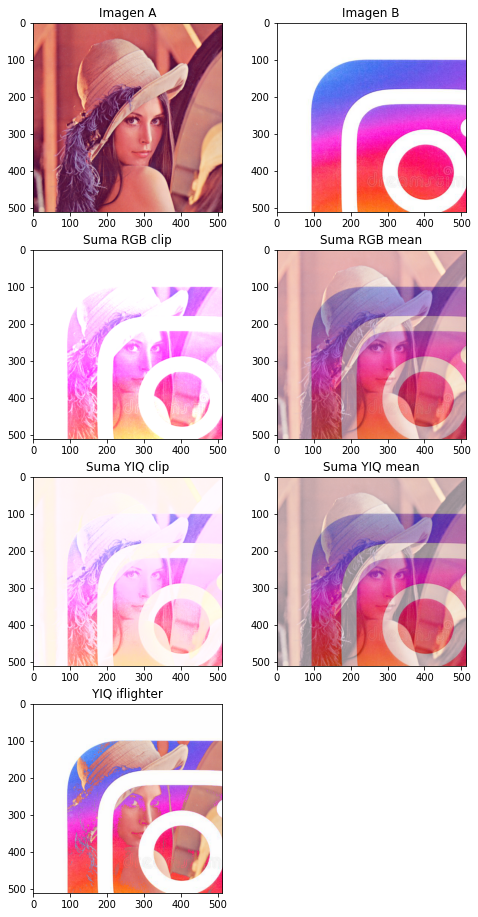

In [ ]:
#Realizo subplots para mostrar todos los resultados de las sumas
fig2, ax2 = plt.subplots(4,2)
fig2.set_size_inches(8,16)
fig2.delaxes(ax2[3,1])

ax2[0,0].imshow(imgAmod)
ax2[0,0].set_title("Imagen A")

ax2[0,1].imshow(imgBmod)
ax2[0,1].set_title("Imagen B")

ax2[1,0].imshow(sumaRGBClip(imgAmod,imgBmod))
ax2[1,0].set_title("Suma RGB clip")

ax2[1,1].imshow(sumaRGBMean(imgAmod,imgBmod))
ax2[1,1].set_title("Suma RGB mean")

ax2[2,0].imshow(sumaYIQClip(imgAmod,imgBmod))
ax2[2,0].set_title("Suma YIQ clip")

ax2[2,1].imshow(sumaYIQMean(imgAmod,imgBmod))
ax2[2,1].set_title("Suma YIQ mean")

ax2[3,0].imshow(YIQiflighter(imgAmod,imgBmod))
ax2[3,0].set_title("YIQ iflighter")

# Análisis de resultados sumas
 Como fue mencionado en la teoría, realizando las operaciones en el espacio RGB se puede generar una deriva cromática la cual ocasiona una cierta distorsión en los colores. Para solucionar esto, se debe trabajar en espacio YIQ ya que se desacopla la luminancia de la cromaticidad y se pueden realizar las operaciones sin modificaciones en el color.

 Por otro lado, en la segunda imagen (logo de Instagram), debido a que el fondo es blanco y por lo tanto su luminancia cercana a 1, en la sumas clip se observa una mayor presencia de dicha imagen ya que la luminancia llega a su máximo rápidamente. No así en la suma YIQ mean, ya que se promedia la luminancia de las dos imágenes, permitiendo una presencia equilibrada de las dos, aún teniendo un fondo blanco en una de ellas. Sucede un fenómeno similar en la operación iflighter, debido a la mayor luminancia de la segunda imagen, la misma posee una mayor presencia.

 Como comentario adicional, al comienzo se realizó un recorte de la imagen más grande para poder realizar las implementadas, sin embargo, un enfoque más óptimo hubiese sido realizar un padding de ceros o unos a la imagen más pequeña con el fin de no perder información de la imagen más grande.


### Se muestran todas las variantes de las operaciones resta para observar como varían entre sí.

Text(0.5, 1.0, 'YIQ ifdarker')

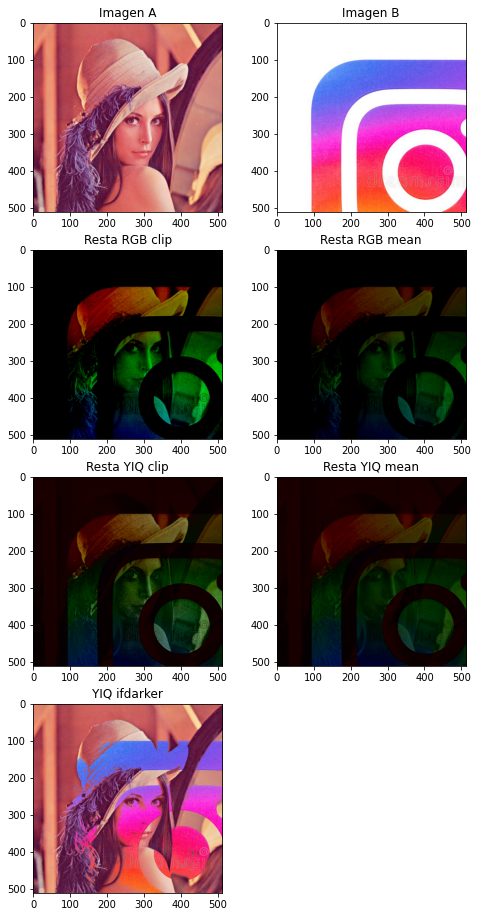

In [ ]:
#Realizo subplots para mostrar todos los resultados de las restas
fig3, ax3 = plt.subplots(4,2)
fig3.set_size_inches(8,16)
fig3.delaxes(ax3[3,1])

ax3[0,0].imshow(imgAmod)
ax3[0,0].set_title("Imagen A")

ax3[0,1].imshow(imgBmod)
ax3[0,1].set_title("Imagen B")

ax3[1,0].imshow(restaRGBClip(imgAmod,imgBmod))
ax3[1,0].set_title("Resta RGB clip")

ax3[1,1].imshow(restaRGBMean(imgAmod,imgBmod))
ax3[1,1].set_title("Resta RGB mean")

ax3[2,0].imshow(restaYIQClip(imgAmod,imgBmod))
ax3[2,0].set_title("Resta YIQ clip")

ax3[2,1].imshow(restaYIQMean(imgAmod,imgBmod))
ax3[2,1].set_title("Resta YIQ mean")

ax3[3,0].imshow(YIQifdarker(imgAmod,imgBmod))
ax3[3,0].set_title("YIQ ifdarker")


### Ahora se cambiarán de lugar las imágenes A y B para observar como varían las restas al realizar dicho cambio.

Text(0.5, 1.0, 'YIQ ifdarker')

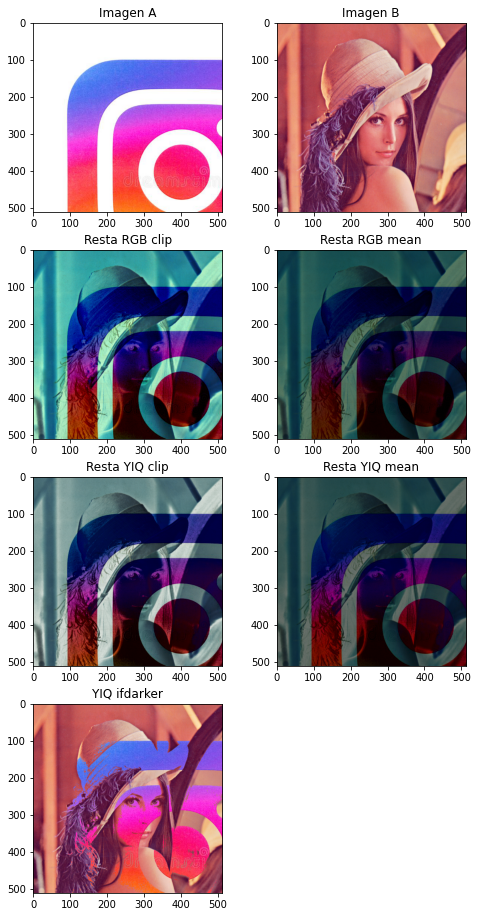

In [ ]:
#Realizo subplots para mostrar todos los resultados de las restas
fig4, ax4 = plt.subplots(4,2)
fig4.set_size_inches(8,16)
fig4.delaxes(ax4[3,1])

#Realizo swap para observar la diferencias en la resta
imgCmod = imgAmod
imgAmod = imgBmod
imgBmod = imgCmod

ax4[0,0].imshow(imgAmod)
ax4[0,0].set_title("Imagen A")

ax4[0,1].imshow(imgBmod)
ax4[0,1].set_title("Imagen B")

ax4[1,0].imshow(restaRGBClip(imgAmod,imgBmod))
ax4[1,0].set_title("Resta RGB clip")

ax4[1,1].imshow(restaRGBMean(imgAmod,imgBmod))
ax4[1,1].set_title("Resta RGB mean")

ax4[2,0].imshow(restaYIQClip(imgAmod,imgBmod))
ax4[2,0].set_title("Resta YIQ clip")

ax4[2,1].imshow(restaYIQMean(imgAmod,imgBmod))
ax4[2,1].set_title("Resta YIQ mean")

ax4[3,0].imshow(YIQifdarker(imgAmod,imgBmod))
ax4[3,0].set_title("YIQ ifdarker")

# Análisis de resultados

Como se puede observar, para el caso de las restas los resultados varían según cual imagen se selecciona primero, lo cual era totalmente esperable y predecible. En el caso de que se reste la segunda imagen, el fondo tiende a valores bajos, ya que como se menciono para el caso de las sumas, el fondo blanco tiene luminancias y valores de RGB altos, por lo que al realizar la resta, el mismo tiene a valores bajos, es decir, colores oscuros. Esto ocasiona que solamente sea perceptible las zonas distinas al fondo, no así para el caso que se reste la imagen de Lenna. Si bien se percibe una distorsión de los colores para este segundo caso, la misma es propia de las operaciones que se realizan. 